<a href="https://colab.research.google.com/github/Rocio206/ADA-Informes/blob/main/MaxSubArray_Informe_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema de Optimización 
**Entrada:** Secuencia de n números $[a1,a2,...,an]$

**Salida:** El sub-arreglo $[a_i,..,a_j]$, tal que la suma de los elementos es mayor o igual a cualquier otro sub-arreglo, es decir, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'\leq n$.

El problema del subarreglo máximo fue propuesto por Ulf Grenander en 1977 como un modelo simplificado para la estimación de máxima verosimilitud de patrones en imágenes digitalizadas.

Hoy en dia surgen en muchos campos, como el análisis de secuencias genómicas y la visión por computadora. 

#Descripcion del Algoritmo
La logica del algorimo para encontrar el máximo sub-arreglo, implementado de forma recursiva, es bastante simple. El máximo sub-arreglo se encuentra a la izquierda del punto de medio, a la derecha de este punto, o lo contiene. Y se realiza de la siguiente manera:
 
1. Dividimos el arreglo en 2 y buscamos, **recursivamente**, el máximo sub-arreglo de cada mitad.

2. Buscamos el máximo sub-arreglo que **contenga el punto de división** usando la funcion MaxSubArrayMid. 

3. Retornamos el los indices de el máximo de los tres sub-arreglos.


#1. Implementacion 
###1.1  MaxSubArrayMid
El codigo a continuacion implementa la funcion **MaxSubArrayMid**. 
Esta función encuentra el sub-arreglo máximo de un arreglo que contenga el elemento mid.


In [17]:
from math import inf

def MaxSubArrayMid(A, low, mid, high):
  suma = 0
  leftSum = -inf      # infinito negativo
  i = mid
  while True:
    suma+= A[i]
    if suma > leftSum:
      leftSum = suma
      maxLeft = i
    i -= 1
    if i < low: break
  
  rightSum = -inf  ## infinito negativo
  suma = 0
  i = mid +1
  while True:
    suma += A[i]
    if suma > rightSum:
      rightSum = suma
      maxRight = i
    i += 1
    if i > high : break

  return maxLeft, maxRight, leftSum + rightSum 

Maximo Subarreglo Medio: [1, 9, -6, 7]
Suma maxima: 11


##1.2 MaxSubArray
En el siguiente codigo se implementa la funcion recursiva **MaxSubArray**, para resolver el problema del sub-arreglo máximo, utilizando el enfoque divide y vencerás.

In [31]:
from math import inf

def MaxSubArrayMid(A, low, mid, high):
  suma = 0
  leftSum = -inf      # infinito negativo
  i = mid
  while True:
    suma+= A[i]
    if suma > leftSum:
      leftSum = suma
      maxLeft = i
    i -= 1
    if i < low: break
  
  rightSum = -inf  ## infinito negativo
  suma = 0
  i = mid +1
  while True:
    suma += A[i]
    if suma > rightSum:
      rightSum = suma
      maxRight = i
    i += 1
    if i > high : break

  return maxLeft, maxRight, leftSum + rightSum 

def MaxSubArray(A, i, j, r, verbose=True):
  r+=1   #contador de recursiones

  if i == j: return i, j, A[i],r
  else:
    mid = (i+j) // 2 
    i_left, j_left, sumLeft,r = MaxSubArray(A, i, mid,r)
    i_right, j_right, sumRight,r = MaxSubArray(A, mid+1, j,r)
    i_center, j_center, sumCenter = MaxSubArrayMid(A, i, mid, j )

    if verbose==True and r > 1:
      print()
      print("Arreglo :", A[i:j+1] )
      print("Sub-arreglos candidatos:")
      print(A[i_left: j_left+1],    "MaxSubArray a la izquierda             #Suma:",sumLeft)
      print(A[i_right: j_right+1],  "MaxSubArray a la derecha               #Suma:",sumRight)
      print(A[i_center: j_center+1],"MaxSubArray que contiene el punto mid  #Suma:", sumCenter)

  if sumLeft >= sumRight and sumLeft >= sumCenter:
    return i_left, j_left, sumLeft, r
  elif sumRight >= sumLeft and sumRight >= sumCenter:
    return i_right, j_right, sumRight, r 
  else : 
    return i_center,j_center, sumCenter, r

#Ejemplo
A = [-2, -3, 4, -1, -2, 1, 5, -3]
print("Entrada:", A)
i , j, maxSuma, r =  MaxSubArray(A, 0, len(A)-1, 0)
print()
print("Maximo Subarreglo:",A[i:j+1])
print("Suma maxima:", maxSuma) 
print("# Recurciones ",r)

Entrada: [-2, -3, 4, -1, -2, 1, 5, -3]

Arreglo : [-2, -3]
Sub-arreglos candidatos:
[-2] MaxSubArray a la izquierda             #Suma: -2
[-3] MaxSubArray a la derecha               #Suma: -3
[-2, -3] MaxSubArray que contiene el punto mid  #Suma: -5

Arreglo : [4, -1]
Sub-arreglos candidatos:
[4] MaxSubArray a la izquierda             #Suma: 4
[-1] MaxSubArray a la derecha               #Suma: -1
[4, -1] MaxSubArray que contiene el punto mid  #Suma: 3

Arreglo : [-2, -3, 4, -1]
Sub-arreglos candidatos:
[-2] MaxSubArray a la izquierda             #Suma: -2
[4] MaxSubArray a la derecha               #Suma: 4
[-3, 4] MaxSubArray que contiene el punto mid  #Suma: 1

Arreglo : [-2, 1]
Sub-arreglos candidatos:
[-2] MaxSubArray a la izquierda             #Suma: -2
[1] MaxSubArray a la derecha               #Suma: 1
[-2, 1] MaxSubArray que contiene el punto mid  #Suma: -1

Arreglo : [5, -3]
Sub-arreglos candidatos:
[5] MaxSubArray a la izquierda             #Suma: 5
[-3] MaxSubArray a la derec

#2. Correctitud
## 2.1 MaxSubArrayMid
La fucion MaxSubArrayMid retorna los indices i y j del sub-arreglo maximo que pasa por en punto medio (mid).

Aunque en la funcion MaxSubArrayMid se usa dos bucles, el primero determina el indice $i$ del sub-arreglo maximo a la izquierda del punto medio y el segundo el indice $j$ del sub-arreglo maximo a la derecha del punto medio  :

> **Propiedad (izquierda):** Al inicio de cada iteracion $t$ (uso esta notacion para no confundir con el indice i), $A[i+1 : mid] \leq A[maxLeft: mid]$.

**Inicializacion:** Al inicio de la primera iteración $t = 1$, maxLeft aun no toma ningun valor por lo que se podriamos decir que cumpliendo trivialmente con la propiedad.

**Mantencion:** Ya que $maxLeft$ toma el valor de i si la sumatoria de elementos de $A[i: mid] $ es mayor a $A[maxLeft: mid]$. Por lo que se cumple la propiedad para cualquier $i = m$.


> **Propiedad (derecha):** Al inicio de cada iteracion $t$ (uso esta notacion para no confundir con el indice i), $A[mid+1: i-1] \leq A[mid+1:maxRight]$.

**Inicializacion:** Al inicio de la primera iteración $t = 1$, maxRight aun no toma ningun valor por lo que se podriamos decir que cumpliendo trivialmente con la propiedad.

**Mantencion:** Ya que durante cada iteracion, $maxRight$ toma el valor de i si la sumatoria de elementos de $A[mid+1: i] $ es mayor a $A[mid+1 : maxRight]$. Por lo que se cumple la propiedad para cualquier $i = m$.


**Correctitud:** Ya que luego del primer bucle, maxLeft y maxRight contendran los indices de posicion cuando al sumatoria de elementos fue mayor. Por lo que el sub-arreglo $A[maxLeft:maxRight]$ sera el sub-arreglo maximo que contenga el punto medio.

##2.2 MaxSubArray
### Teorema (correctitud)
El algoritmo MaxSubArray retorna los indices $i$ y $j$ de el maximo sub-arreglo tal que, $\sum\limits_{k=i}^j a_k \geq \sum\limits_{k=i'}^{j'} a_k$ , para cualquier par $(i',j')$, con $i' \leq j'.

####Prueba del teorema
Como **MaxSubArray** es un algoritmo recursivio usaremos **inducción matematica** por lo que probaremos la siguiente hipótesis:

> **Hipotesis $P(n)$** El algoritmo MaxSubArray retorna los indices $i$ y $j$ de el maximo sub-arreglo contenido en en una secuencia de n numeros.

**Caso base:** Cuando $n=1$, MaxSubArray retorna i=0 y j=0, indices correspondientes a la posicion del primer y unico elemento del arreglo, por lo que se cumple $P(1)$.

**Paso inductivo:** Para $n$ elementos, se divide el arreglo en dos $(mid=n/2)$ y se buscan, recursivamente, los indices del maximo sub-arreglo a la izquieda del punto medio $(a_1...mid)$ y del maximo sub-arreglo a la derecha del punto medio $(mid+1...a_n)$ .
Luego usando la funcion MaxSubArrayMid buscamos el máximo sub-arreglo que contenga el punto medio. Finalmente se comparan los tres sub-arreglos y se retorna el mayor. Por lo que, **MaxSubArray es correcto**.






#3. Analisis del tiempo de ejecución
Para resolver la recurencia del algoritmo MaxSubArray utilizaremos el **Teorema Maestro** el cual nos presenta una formula para resolver recurrencias del tipo:
$T(n) \leq aT(n/b)+O(n^b)$

![image](https://imgur.com/rFgxKOz.png)

> **Funcion de recurrencia para MaxSubArray:**
        
$T(n) = \begin{cases}
  O(1)  & n \text{ = 1} \\
  2 T(n/2) + O(n) & \text{ otherwise}
\end{cases}$


Si aplicamos el teorema a la funcion de recurrencia de MaxSubArray, encontramos el tiempo de ejecución, $O(nlog(n))$.

**Mejor caso:** El mejor casos seria cuando $n = 1$, ya que lo se retorna inmediatamente, sin realizar ninguna recursión. Esto tendria un tiempo de ejecución $O(1)$.

**Peor caso:** El peor de caso seria cuando $n > 1$, ya que se hacen $log(n)$ recursiones. Si sumamos el tiempo de ejecución $O(n)$ de la funcion MaxSubArrayMid nos da un tiempo de ejecución $O(nlog(n))$.



#4. Experimentos
##4.1 MaxSubArray vs Kadane
En el siguiente grafico se muestra una comparación entre el tiempo de ejecucion de MaxSubArray y Kadanen ($O(n)$), en función del tamaño del problema para arreglos generados aleatoriamente de tamaños entre 5 y 500 .

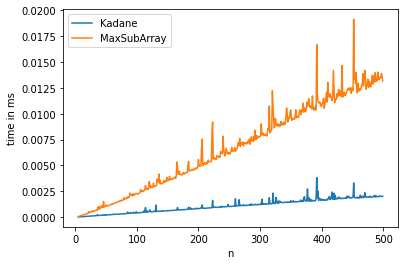

In [46]:
import random
import math
from math import inf 
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def MaxSubArrayMid(A, low, mid, high):
  suma = 0
  leftSum = -inf      # infinito negativo
  i = mid
  while True:
    suma+= A[i]
    if suma > leftSum:
      leftSum = suma
      maxLeft = i
    i -= 1
    if i < low: break
  
  rightSum = -inf  ## infinito negativo
  suma = 0
  i = mid +1
  while True:
    suma += A[i]
    if suma > rightSum:
      rightSum = suma
      maxRight = i
    i += 1
    if i > high : break

  return maxLeft, maxRight, leftSum + rightSum 

def MaxSubArray(A, i, j):
  if i== j: return i, j, A[i]
  else:
    mid = (i+j) // 2 
    i_left, j_left, sumLeft = MaxSubArray(A, i, mid)
    i_right, j_right, sumRight = MaxSubArray(A, mid+1, j)
    i_center, j_center, sumCenter = MaxSubArrayMid(A, i, mid, j )

  if sumLeft >= sumRight and sumLeft >= sumCenter:
    return i_left, j_left, sumLeft 
  elif sumRight >= sumLeft and sumRight >= sumCenter:
    return i_right, j_right, sumRight
  else : 
    return i_center,j_center, sumCenter

#Kadane
def kadane(A):
  max_so_far = 0
  max_ending_here = 0
  for i in A:
    max_ending_here += + i
    max_ending_here = max(max_ending_here, 0)
    max_so_far = max(max_so_far, max_ending_here)
  return max_so_far

x=[]; y=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["Kadane","MaxSubArray"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

### Analisis de resultados
Viendo los resultados notamos como el algoritmo Kanade es mucho mas rapido. El tiempo de ejecucion de MaxSubArray se expresa linealmente en funcion al tamaño del problema, como era de esperar por su tiempo de ejecucion teorico $O(nlog(n))$.

##4.2 MaxSubArray vs MergeSort
En el siguiente grafico veremos un comparación entre el tiempo de ejecusion del algoritmo de ordenamiento MergeSort y el algoritmo de optimizacion MaxSubArrayMid implementado recursivamente. En teoria ambos deberian mostrar resultados similares, ya que ambos tienen un tiempo de ejecución $O(nlog(n))$ y la misma funcion de recursividad.

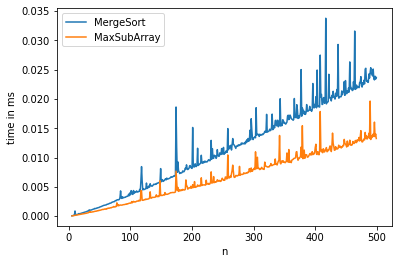

In [44]:
import random
import math
import matplotlib.pyplot as plt
from math import inf 

def merge(a, b, t ):
  c = [] 
  while len(a) > 0 and len(b) > 0:
    t += 1                      #contador de comparaciones 
    if a[0] < b[0]:          
      c.append (a[0])
      a.pop(0)
    else: 
      c.append (b[0])
      b.pop(0)
   
  if len(a) == 0:  # agrego los elementos del arreglo que me queda al final de c
    c += b
  else: 
    c += a
  return c , t

def mergeSort(arr):
  if len(arr) < 2: return arr , 0
  else:
    mid = len(arr) // 2
    right, t1= mergeSort(arr[:mid])
    left, t2= mergeSort(arr[mid:])
    return merge(right, left, t1+t2)

def MaxSubArrayMid(A, low, mid, high):
  suma = 0
  leftSum = -inf      # infinito negativo
  i = mid
  while True:
    suma+= A[i]
    if suma > leftSum:
      leftSum = suma
      maxLeft = i
    i -= 1
    if i < low: break
  
  rightSum = -inf  ## infinito negativo
  suma = 0
  i = mid +1
  while True:
    suma += A[i]
    if suma > rightSum:
      rightSum = suma
      maxRight = i
    i += 1
    if i > high : break

  return maxLeft, maxRight, leftSum + rightSum 

def MaxSubArray(A, i, j):
  if i== j: return i, j, A[i]
  else:
    mid = (i+j) // 2 
    i_left, j_left, sumLeft = MaxSubArray(A, i, mid)
    i_right, j_right, sumRight = MaxSubArray(A, mid+1, j)
    i_center, j_center, sumCenter = MaxSubArrayMid(A, i, mid, j )

  if sumLeft >= sumRight and sumLeft >= sumCenter:
    return i_left, j_left, sumLeft 
  elif sumRight >= sumLeft and sumRight >= sumCenter:
    return i_right, j_right, sumRight
  else : 
    return i_center,j_center, sumCenter

x=[]; y=[]; y2=[]

for n in range(5,500):

  a = random.sample(range(-500, 500), n)

  #la función repeat está ejecutando 20 veces bubble_sort con el arreglo a y retorna el mejor tiepo obtenido.
  t = repeat(setup="from __main__ import mergeSort", stmt=f"mergeSort({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import MaxSubArray", stmt=f"MaxSubArray({a},{0},{len(a)-1})", repeat=1, number=10)

  x.append(n)
  y.append(t)
  y2.append(t2)


plt.plot(x,y)
plt.plot(x,y2)
plt.legend(["MergeSort","MaxSubArray"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()



###Analisis de resultados
Como era esperado el tiempo de ejecucion de ambos algoritmos se expresa linealmente con respecto al tamaño del problema. Sin embargo, MaxSubArray es mas rapido.